In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from prettytable import PrettyTable

In [2]:
df = pd.read_csv("./data/minimal_data.csv")
df

,texture_mean,area_mean,smoothness_mean,concavity_mean,area_se,smoothness_worst,compactness_worst,symmetry_worst,diagnosis
0,17.27,713.3,0.13350,0.24480,59.46,0.1765,0.4503,0.3258,1
1,18.36,412.7,0.08508,0.03367,12.89,0.1342,0.1808,0.3210,0
2,16.95,552.4,0.07937,0.02181,13.22,0.1213,0.1676,0.2741,0
3,16.84,234.3,0.10390,0.00000,28.85,0.1460,0.1310,0.2445,0
4,18.00,506.3,0.09934,0.03889,20.35,0.1289,0.2141,0.2779,0
...,...,...,...,...,...,...,...,...,...
709,10.38,1001.0,0.11840,0.30010,153.40,0.1622,0.6656,0.4601,1
710,16.99,290.2,0.10370,0.04334,22.87,0.1467,0.1765,0.2533,0
711,25.09,1347.0,0.10990,0.31740,118.80,0.1407,0.4186,0.2929,1
712,17.62,365.6,0.09687,0.05263,10.09,0.1428,0.2510,0.2289,0


In [3]:
df.columns


Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'area_se', 'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'diagnosis'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   texture_mean       714 non-null    float64
 1   area_mean          714 non-null    float64
 2   smoothness_mean    714 non-null    float64
 3   concavity_mean     714 non-null    float64
 4   area_se            714 non-null    float64
 5   smoothness_worst   714 non-null    float64
 6   compactness_worst  714 non-null    float64
 7   symmetry_worst     714 non-null    float64
 8   diagnosis          714 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 50.3 KB


## `Splitting the data`

In [5]:
X = df.drop("diagnosis", axis =1)
y = df["diagnosis"]

In [6]:
X

,texture_mean,area_mean,smoothness_mean,concavity_mean,area_se,smoothness_worst,compactness_worst,symmetry_worst
0,17.27,713.3,0.13350,0.24480,59.46,0.1765,0.4503,0.3258
1,18.36,412.7,0.08508,0.03367,12.89,0.1342,0.1808,0.3210
2,16.95,552.4,0.07937,0.02181,13.22,0.1213,0.1676,0.2741
3,16.84,234.3,0.10390,0.00000,28.85,0.1460,0.1310,0.2445
4,18.00,506.3,0.09934,0.03889,20.35,0.1289,0.2141,0.2779
...,...,...,...,...,...,...,...,...
709,10.38,1001.0,0.11840,0.30010,153.40,0.1622,0.6656,0.4601
710,16.99,290.2,0.10370,0.04334,22.87,0.1467,0.1765,0.2533
711,25.09,1347.0,0.10990,0.31740,118.80,0.1407,0.4186,0.2929
712,17.62,365.6,0.09687,0.05263,10.09,0.1428,0.2510,0.2289


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size = 0.2)

print(f"The shape of Training data {x_train.shape}")
print(f"The shape of Testing data {x_test.shape}")

The shape of Training data (571, 8)
The shape of Testing data (143, 8)


## `Scaling the data`

In [8]:
mm_scaler = MinMaxScaler()

# Fit and transform the data
X_train_mm_scaled = mm_scaler.fit_transform(x_train)
X_test_mm_scaled = mm_scaler.transform(x_test)

# Modelling:

In [9]:
def NormalTraining(model, x_train, X_test, y, y_test):
    fit = model.fit(x_train, y)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    return fit, y_pred, recall

def CrossValidation(score_type, n_of_splits, clf, X, y):
    # Creating a custom scoring function using recall
    scorer = make_scorer(score_type)
    # Performing 5-fold cross-validation
    cv = StratifiedKFold(n_splits = n_of_splits)
    # fitting the model
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scorer)
    # Printing the cross-validation scores
#     print("Recall scores for each fold:", rf_scores)
    print("Mean of the models score:", scores.mean())

# Function for accuracies:
def ModelEvaluation(model, model_name, x_train, y_train, x_test, y_test, y_pred):
    evaluation_arr = []
    acc_trian = round(model.score(x_train, y_train), 2)
    print('\033[1m' + f'Training Acc of {model_name}:' + '\033[0m' + f": {acc_trian}")
    acc_test = round(model.score(x_test, y_test), 2)
    evaluation_arr.append(acc_test)
    precision = round(precision_score(y_test, y_pred)*100, 2)
    evaluation_arr.append(precision)
    recall = round(recall_score(y_test, y_pred)*100, 2)
    evaluation_arr.append(recall)
    f1 = round(f1_score(y_test, y_pred)*100, 2)
    evaluation_arr.append(f1)
    roc_auc = roc_auc_score(y_test, y_pred)
    evaluation_arr.append(roc_auc)
    return evaluation_arr
#     print('\033[1m' + 'Training Acc' + '\033[0m' + f": {acc_trian}")
#     print('\033[1m' + 'Testing Acc' + '\033[0m' + f": {acc_test}")
#     print('\033[1m' + 'Recall' + '\033[0m' + f": {recall}")
#     print('\033[1m' + 'precision' + '\033[0m' + f": {precision}")
#     print('\033[1m' + 'F1_score' + '\033[0m' + f": {f1}")
#     print(f"ROC AUC Score: {roc_auc}")
#     print("*************************************************************************")


def GridSearch(clf, param_grid_clf, cv, score_type, X, y):
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator= clf, param_grid = param_grid_clf, cv = cv, scoring=score_type, n_jobs=-1)
    # Perform the grid search
    grid_search.fit(X, y)
    # Print the best parameters found
    print("Best parameters found: ", grid_search.best_params_)
    

# Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted, color):
    # colours = ["Blues", "YlGnBu", "BuPu", "Greens", "PiYG", "Blues"]
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)
    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=color)
    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))   
    
def DrawRocCurve(model_name, actual, prediction):
    roc_auc = roc_auc_score(actual, prediction)
#     print(f"ROC AUC Score: {roc_auc}")
    fpr, tpr, thresholds = roc_curve(actual, prediction)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC {model_name} Curve')
    plt.legend()
    plt.show()

# NormalTraining(model, X_train, X_test, y, y_test)  
# CrossValidation(score_type, n_of_splits, clf, X, y)
# ModelEvaluation(model, model_name, x_train, y_train, x_test, y_test)
# GridSearch(clf, param_grid_clf, cv, score_type, X, y)
# cmatrix_fun(model_name, actual, predicted, color)
# classification_report_fun(model_name, actual, predicted)



## `Random Forest Classifier`

In [10]:
rf_classifier = RandomForestClassifier(random_state = 3)
rf_cross = RandomForestClassifier(random_state = 42)
rf_clf = RandomForestClassifier(random_state = 42)

In [11]:
rf_classifier, y_pred_rf_default, recall_rf_default = NormalTraining(rf_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_rf_default

0.9861111111111112

In [12]:
CrossValidation(recall_score, 5, rf_cross, X_train_mm_scaled, y_train)

Mean of the models score: 0.9719298245614034


#### Grid Search on RF

In [13]:
# n_estimators -> the number of knieghbours
# criterion -> quality of a split
# max_features ->
# min_samples_split -> minimum number of samples required to split a node
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

GridSearch(rf_clf, param_grid_rf, 5, 'recall', X_train_mm_scaled, y_train)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 100}


In [14]:
# On the standard scaling
rf_clf = RandomForestClassifier(criterion ='gini', max_depth =10, max_features= 'auto',min_samples_split= 2, n_estimators=300, random_state = 3)

rf_clf, y_pred_rf, recall_rf = NormalTraining(rf_clf, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_rf

0.9861111111111112

In [15]:
# On the standard scaling
rf_clf = RandomForestClassifier(criterion ='gini', max_depth =10, max_features= 'sqrt',min_samples_split= 2, n_estimators=300, random_state = 3)

rf_clf, y_pred_rf, recall_rf = NormalTraining(rf_clf, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_rf

0.9861111111111112

In [16]:
# On the standard scaling
rf_clf = RandomForestClassifier(criterion ='gini', max_depth =10, max_features= 'log2',min_samples_split= 2, n_estimators=300, random_state = 3)

rf_clf, y_pred_rf, recall_rf = NormalTraining(rf_clf, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_rf

1.0

In [17]:
ModelEvaluation(rf_clf, "Random Forest", X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, y_pred_rf)

Training Acc of Random Forest:: 1.0


[0.99, 98.63, 100.0, 99.31, 0.9929577464788732]

[[70  0]
 [ 1 72]]


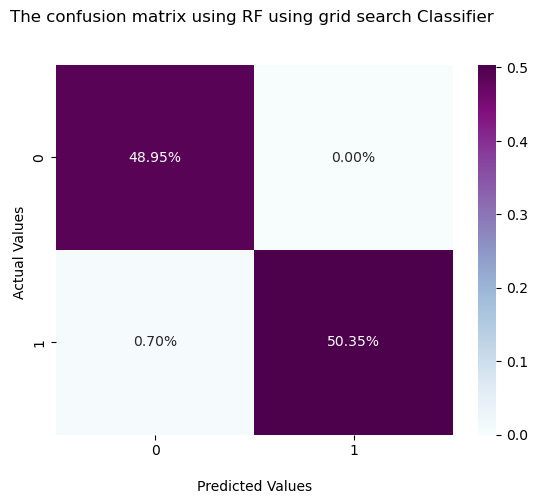

In [18]:
cmatrix_fun("RF using grid search", y_pred_rf, y_test, "BuPu")

0.9998043818466353


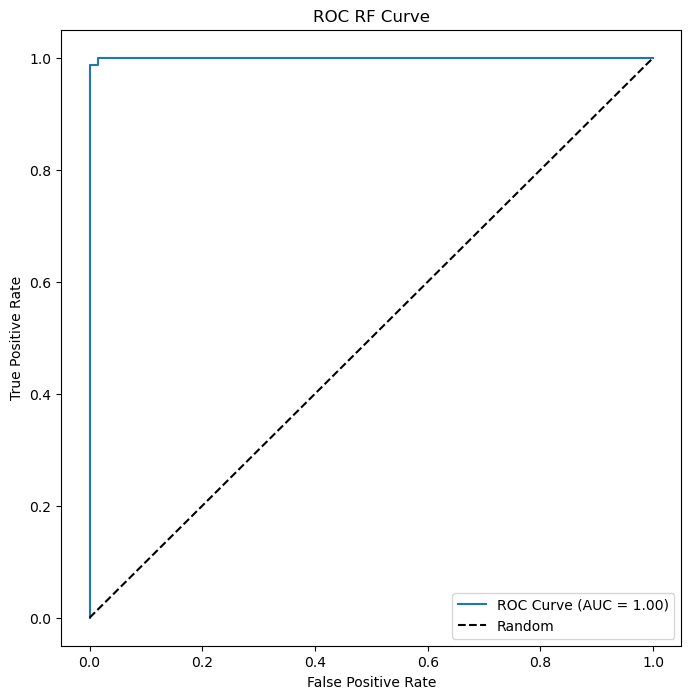

In [19]:
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test_mm_scaled)[:, 1])
print(roc_auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test_mm_scaled)[:, 1])

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RF Curve')
plt.legend()
plt.show()

## `Decision Trees Classifier`

In [20]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_cross = DecisionTreeClassifier(random_state = 42)
dt_clf = DecisionTreeClassifier(random_state = 42)

In [21]:
dt_classifier, y_pred_dt_default, recall_dt_default = NormalTraining(dt_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_dt_default

0.9444444444444444

In [22]:
CrossValidation(recall_score, 5, dt_cross, X_train_mm_scaled, y_train)

Mean of the models score: 0.9614035087719298


### Grid Search on DT

In [23]:
# Define the grid of parameters to search
# min_samples_leaf -> minimum number of samples required to be at a leaf node
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
GridSearch(dt_clf, param_grid_dt, 5, 'recall', X_train_mm_scaled, y_train)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [24]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf= 1, min_samples_split= 5, random_state = 42)

dt_clf, y_pred_dt, recall_dt = NormalTraining(dt_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_dt

0.9444444444444444

In [25]:
ModelEvaluation(dt_clf, "Decision Tree", X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, y_pred_dt)

Training Acc of Decision Tree:: 1.0


[0.94, 94.44, 94.44, 94.44, 0.9440532081377152]

[[67  4]
 [ 4 68]]


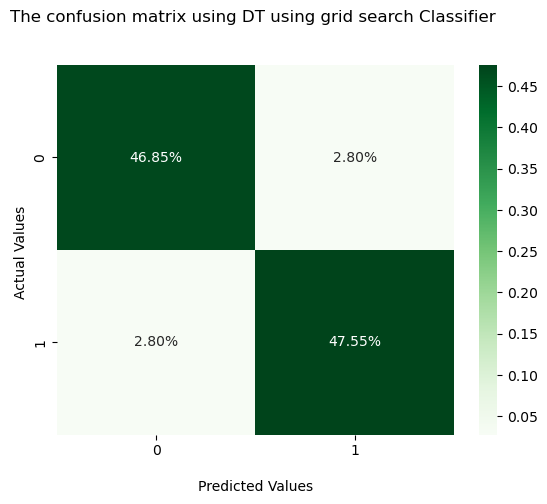

In [26]:
cmatrix_fun("DT using grid search", y_pred_dt, y_test, "Greens")


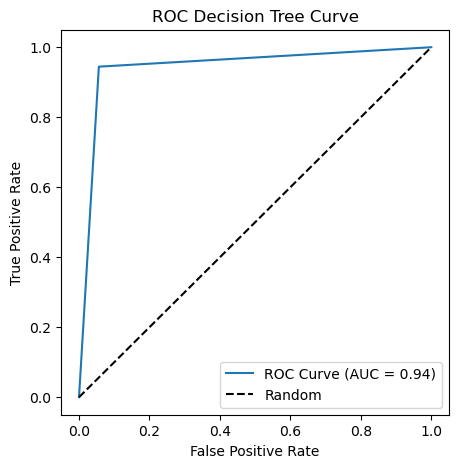

In [27]:
DrawRocCurve("Decision Tree", y_test, y_pred_dt)

## `SVM`

In [28]:
svm_classifier = SVC(random_state = 42)
svm_cross = SVC(random_state = 42)
svm_clf = SVC(random_state = 42)

In [29]:
svm_classifier, y_pred_svm_default, recall_svm_default = NormalTraining(svm_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_svm_default

0.9166666666666666

In [30]:
CrossValidation(recall_score, 5, svm_cross, X_train_mm_scaled, y_train)

Mean of the models score: 0.9298245614035088


### Grid search on SVM

In [31]:
# regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error
# influence of a single training example, A low value for gamma implies smoother decision boundary.
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

GridSearch(svm_clf, param_grid_svm, 5, 'recall', X_train_mm_scaled, y_train)

Best parameters found:  {'C': 100, 'gamma': 1, 'kernel': 'poly'}


In [32]:
svm_clf = SVC(C = 0.1, gamma= 0.001, kernel= 'poly', random_state = 42)

svm_clf, y_pred_svm, recall_svm = NormalTraining(svm_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_svm

0.9166666666666666

In [33]:
ModelEvaluation(svm_clf, "Support Vector Machine", X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, y_pred_svm)

Training Acc of Support Vector Machine:: 0.96


[0.95, 98.51, 91.67, 94.96, 0.9512910798122065]

[[70  6]
 [ 1 66]]


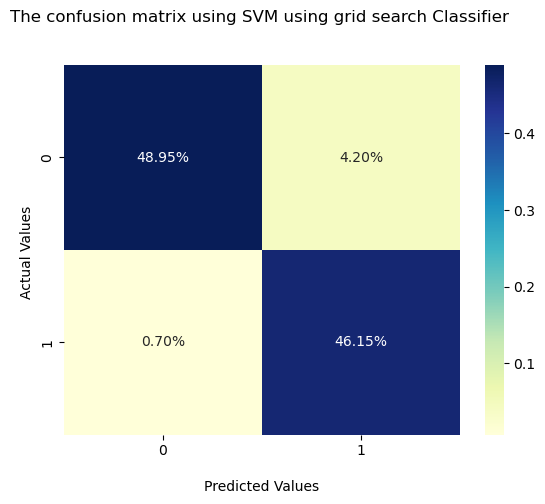

In [34]:
cmatrix_fun("SVM using grid search", y_pred_svm, y_test, "YlGnBu")

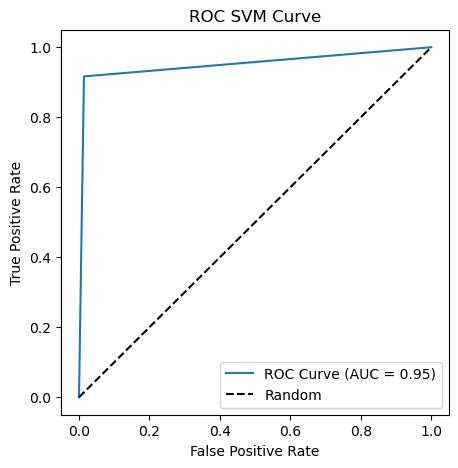

In [35]:
DrawRocCurve("SVM", y_test, y_pred_svm)

## `K-Nearest Neighbors Classifier`

In [36]:
knn_classifier = KNeighborsClassifier()
knn_cross = KNeighborsClassifier()
knn_clf = KNeighborsClassifier()

In [37]:
knn_classifier, y_pred_knn_default, recall_knn_default = NormalTraining(knn_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_knn_default

0.9166666666666666

In [38]:
CrossValidation(recall_score, 5, knn_cross, X_train_mm_scaled, y_train)

Mean of the models score: 0.9263157894736842


### Grid search with knn

In [39]:
# Define the grid of parameters to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 29, 31],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # for Minkowski distance (p=1 for Manhattan distance, p=2 for Euclidean distance)
}

# Create the GridSearchCV object
GridSearch(knn_clf, param_grid_knn, 5, 'recall', X_train_mm_scaled, y_train)

Best parameters found:  {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [40]:
knn_clf = KNeighborsClassifier(n_neighbors= 13, p= 1, weights= 'distance')  

knn_clf, y_pred_knn, recall_knn = NormalTraining(knn_clf, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_knn

0.9722222222222222

In [41]:
ModelEvaluation(knn_clf, "Decision Tree", X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, y_pred_knn)

Training Acc of Decision Tree:: 1.0


[0.97, 97.22, 97.22, 97.22, 0.9720266040688577]

[[70  6]
 [ 1 66]]


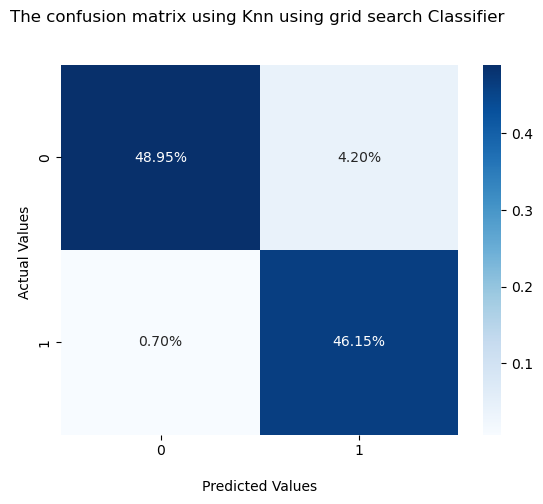

In [42]:
cmatrix_fun("Knn using grid search", y_pred_svm, y_test, "Blues")

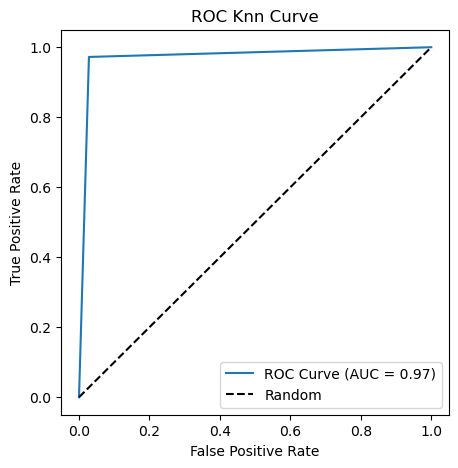

In [43]:
DrawRocCurve("Knn", y_test, y_pred_knn)

## `Multilayer Perceptron`

In [44]:
ml_classifier = MLPClassifier()
ml_cross = MLPClassifier()
ml_clf = MLPClassifier()

In [45]:
ml_classifier, y_pred_ml_default, recall_ml_default = NormalTraining(ml_classifier, X_train_mm_scaled, X_test_mm_scaled, y_train, y_test)

recall_ml_default

0.9305555555555556

[[70  5]
 [ 1 67]]


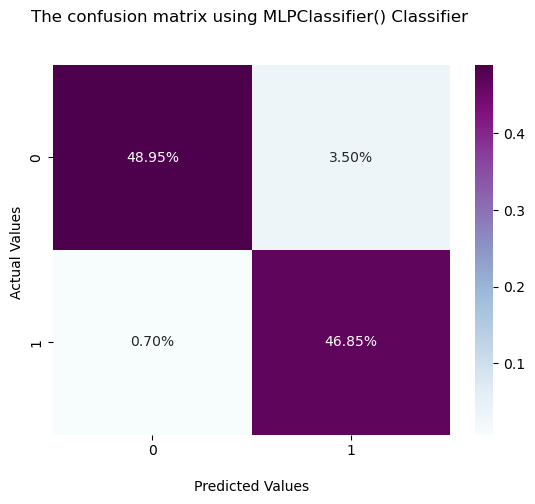

In [46]:
cmatrix_fun(ml_classifier, y_pred_ml_default, y_test, "BuPu")

In [47]:
CrossValidation(recall_score, 5, ml_cross, X_train_mm_scaled, y_train)

Mean of the models score: 0.9438596491228071


### Grid search for ML

In [48]:
# Define the grid of parameters to search
# alpha -> learning rate
param_grid_ml = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

GridSearch(ml_clf, param_grid_ml, 5, 'recall', X_train_mm_scaled, y_train)

Best parameters found:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [49]:
ml_clf = MLPClassifier(activation= 'logistic', alpha= 0.0001, hidden_layer_sizes = (50,), learning_rate = 'adaptive', solver = 'sgd')

ml_clf.fit(X_train_mm_scaled, y_train)
y_pred_ml = ml_clf.predict(X_test_mm_scaled)

recall_ml = recall_score(y_test, y_pred_ml)
recall_ml

0.8611111111111112

In [50]:
ml_clf = MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes = (50,), learning_rate = 'adaptive', solver = 'sgd')

ml_clf.fit(X_train_mm_scaled, y_train)
y_pred_ml = ml_clf.predict(X_test_mm_scaled)

recall_ml = recall_score(y_test, y_pred_ml)
recall_ml

0.9444444444444444

[[62  4]
 [ 9 68]]


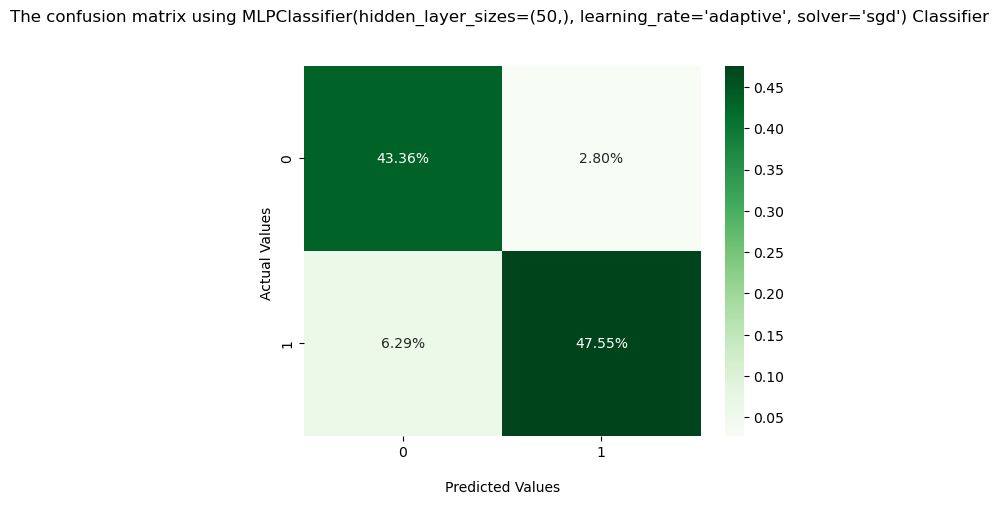

In [51]:
cmatrix_fun(ml_clf, y_pred_ml, y_test, "Greens")

In [52]:
ml_clf = MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes = (100, 50, 100), learning_rate = 'adaptive', solver = 'adam')

ml_clf.fit(X_train_mm_scaled,y_train)
y_pred_ml = ml_clf.predict(X_test_mm_scaled)

#ml_clf.score(X_test_mm_scaled, y_test)
recall_ml = recall_score(y_test, y_pred_ml)
print(recall_ml)

0.9583333333333334


In [53]:
y_pred_ml

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
ModelEvaluation(ml_clf, "Multilayer perceptron", X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, y_pred_ml)

Training Acc of Multilayer perceptron:: 0.98


[0.97, 98.57, 95.83, 97.18, 0.97212441314554]

[[70  3]
 [ 1 69]]


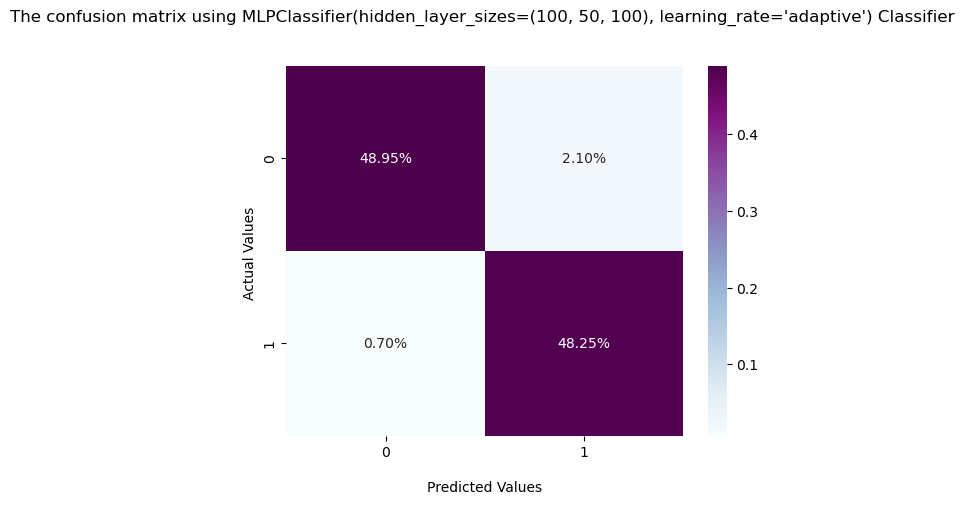

In [55]:
cmatrix_fun(ml_clf, y_pred_ml, y_test, "BuPu")

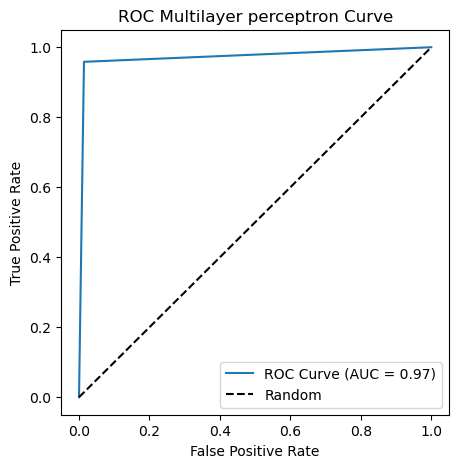

In [56]:
DrawRocCurve("Multilayer perceptron", y_test, y_pred_ml)

# Evaluation:

### `Some helpful functions`

In [57]:
classifiers_name = ["RF", "SVM", "DT", "ML", "KNN"]
model = [rf_clf, svm_clf, dt_clf, ml_clf, knn_clf]
predicted_target = [y_pred_rf, y_pred_svm, y_pred_dt, y_pred_ml, y_pred_knn]

print("The Evaluation after grid search:")
table = PrettyTable()
table.add_column("Model", classifiers_name)
test_acc = []
precision = []
recall = []
f1 = []
roc = []

for i in range(len(classifiers_name)):
    eval_arr = ModelEvaluation(model[i], classifiers_name[i], X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, predicted_target[i])
    test_acc.append(eval_arr[0])
    precision.append(eval_arr[1])
    recall.append(eval_arr[2])
    f1.append(eval_arr[3])
    roc.append(eval_arr[4])

table.add_column("Accuracy", test_acc)
table.add_column("Precision", precision)
table.add_column("Recall", recall)
table.add_column("f1-score", f1)
table.add_column("ROU-AUC", roc)
table

The Evaluation after grid search:
Training Acc of RF:: 1.0
Training Acc of SVM:: 0.96
Training Acc of DT:: 1.0
Training Acc of ML:: 0.98
Training Acc of KNN:: 1.0


Model,Accuracy,Precision,Recall,f1-score,ROU-AUC
RF,0.99,98.63,100.0,99.31,0.9929577464788732
SVM,0.95,98.51,91.67,94.96,0.9512910798122065
DT,0.94,94.44,94.44,94.44,0.9440532081377152
ML,0.97,98.57,95.83,97.18,0.97212441314554
KNN,0.97,97.22,97.22,97.22,0.9720266040688577


In [58]:
model = [rf_classifier, svm_classifier, dt_classifier, knn_classifier, ml_classifier]
predicted_target = [y_pred_rf_default, y_pred_svm_default, y_pred_dt_default, y_pred_knn_default, y_pred_ml_default]

print("The Evaluation before grid search")
table = PrettyTable()
table.add_column("Model", classifiers_name)
test_acc = []
precision = []
recall = []
f1 = []
roc = []

for i in range(len(classifiers_name)):
    eval_arr = ModelEvaluation(model[i], classifiers_name[i], X_train_mm_scaled, y_train, X_test_mm_scaled, y_test, predicted_target[i])
    test_acc.append(eval_arr[0])
    precision.append(eval_arr[1])
    recall.append(eval_arr[2])
    f1.append(eval_arr[3])
    roc.append(eval_arr[4])

table.add_column("Accuracy", test_acc)
table.add_column("Precision", precision)
table.add_column("Recall", recall)
table.add_column("f1-score", f1)
table.add_column("ROU-AUC", roc)
table

The Evaluation before grid search
Training Acc of RF:: 1.0
Training Acc of SVM:: 0.96
Training Acc of DT:: 1.0
Training Acc of ML:: 0.96
Training Acc of KNN:: 0.96


Model,Accuracy,Precision,Recall,f1-score,ROU-AUC
RF,0.99,98.61,98.61,98.61,0.9860133020344288
SVM,0.95,98.51,91.67,94.96,0.9512910798122065
DT,0.94,94.44,94.44,94.44,0.9440532081377152
ML,0.92,92.96,91.67,92.31,0.9231220657276995
KNN,0.96,98.53,93.06,95.71,0.958235524256651
